In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulado para a prova

## Exercício 1

Dadas as matrizes:

$$
A = \begin{bmatrix} 0 & 1\\ 2 & 3 \end{bmatrix} \\

B = \begin{bmatrix} 7 & 9\\ 23 & -1 \end{bmatrix}
$$

calcule:

1. $AB$
1. $BA$
1. $A \odot B$
1. $A^TB$
1. $AB^{-1}$

$(AB)^T = B^T A^T$


In [5]:

A = np.array( [[0,1],[2,3]])
B = np.array( [[7, 9],[23, -1]])
x1 = A @ B
x2 = B @ A
x3 = A * B
x4 = A.T @ B
x5 = A @ np.linalg.inv(B)
print(x1)
print('-----------------')
print(x2)
print('-----------------')
print(x3)
print('-----------------')
print(x4)
print('-----------------')
print(x5)

[[23 -1]
 [83 15]]
-----------------
[[18 34]
 [-2 20]]
-----------------
[[ 0  9]
 [46 -3]]
-----------------
[[46 -2]
 [76  6]]
-----------------
[[ 0.10747664 -0.03271028]
 [ 0.3317757  -0.01401869]]


# Exercício 2

Eu tenho uma núvem de pontos que está em um quadrado cujo centro é o ponto $(-2,3)$. Qual é a matriz que transforma essa núvem de pontos em uma núvem semelhante, rotacionada de 30 graus no sentido anti-horário, centrada em $(5,5)$? Se precisar, use coordenadas homogêneas!

$$
R = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
T = 
\begin{bmatrix}
    1 & 0 & \Delta x \\
    0 & 1 & \Delta y \\
    0 & 0 & 1
\end{bmatrix}
$$

[[ 0.8660254 -0.5        5.       ]
 [ 0.5        0.8660254  5.       ]
 [ 0.         0.         1.       ]]


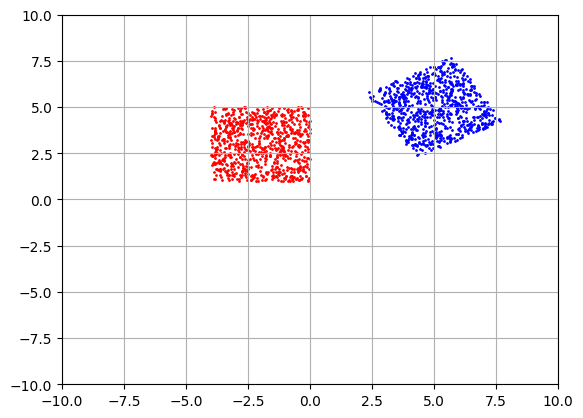

In [32]:
x = np.random.uniform(-2, 2, size=(2, 800))
x = np.vstack((x, np.ones((1, 800))))

C = np.array([[1, 0, -2], [0, 1, 3], [0, 0, 1]])
x = C @ x

T = np.array([[1, 0, 2], [0, 1, -3], [0, 0, 1]])

theta = np.deg2rad(30)
R = np.array([[np.cos(theta), -np.sin(theta), 5], [np.sin(theta), np.cos(theta), 5], [0, 0, 1]])

y = T @ x
y = R @ y

resposta = C @ T @ R
print(resposta)

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid()
plt.show()

# Exercício 3

Quatro amigos foram a uma lanchonete, e fizeram os seguintes pedidos:

* 1 x-salada e 1 suco de laranja, no total de R$10,00,
* 2 x-salada e 2 suco de laranja, no total de R$20,00,
* 2 x-salada e 1 suco de laranja, no total de R$13,00,
* 4 x-salada e 2 suco de laranja, no total de R$26,00.


1. Qual é o preço do x-salada?
1. Qual é o preço do suco de laranja?
1. Qual é o valor de uma compra de 1 x-salada e 2 sucos de laranja?


In [35]:
'''
Expressoes
# x salada = x
# suco de laranja = y

x + y = 10
2x + 2y = 20
2x + y = 13
4x + 2y = 26
'''
print('Qual o preço do X-salada?')
print('X-salada custa 3 reais')
print('Qual o preço do suco de laranja?')
print('Suco de laranja custa 7 reais')
print('------------------')
print('''

Conta:
X-salada + Suco de laranja = R$ 10,00
2X-salada + 2Suco de laranja = R$ 20,00
2X-salada + Suco de laranja = R$ 13,00
4X-salada + 2Suco de laranja = R$ 26,00

1 * 3 + 1 * 7 = 10
2 * 3 + 2 * 7 = 20
2 * 3 + 1 * 7 = 13
4 * 3 + 2 * 7 = 26

''')


Qual o preço do X-salada?
X-salada custa 3 reais
Qual o preço do suco de laranja?
Suco de laranja custa 7 reais
------------------


Conta:
X-salada + Suco de laranja = R$ 10,00
2X-salada + 2Suco de laranja = R$ 20,00
2X-salada + Suco de laranja = R$ 13,00
4X-salada + 2Suco de laranja = R$ 26,00

1 * 3 + 1 * 7 = 10
2 * 3 + 2 * 7 = 20
2 * 3 + 1 * 7 = 13
4 * 3 + 2 * 7 = 26




# Exercício 4

Cada real investido na empresa E1 deu um retorno de 50 centavos ao fim de um ano. Cada real investido na empresa E2 deu um retorno de 10 centavos ao fim de um ano. Uma corretora propôs duas carteiras: C1, em que cada real é dividido igualmente entre as empresas E1 e E2, e C2, que tem 75% de aplicação na empresa E1 e 25% na empresa E2.

1. Se um investidor tem 5000 reais investidos na carteira C1 e 1000 na carteira C2, qual é o seu investimento nas empresas E1 e E2?
1. Se um investidor tem 2000 reais investidos diretamente na empresa E1, e 2000 reais na empresa E2, qual seria o investimento nas carteiras C1 e C2 equivalente?
1. Qual é a matriz que permite transformar investimentos nas empresas E1 e E2 em investimentos nas carteiras C1 e C2?

$$
E_1 = 0.5 C_1 + 0.75 C_2 \\
E_2 = 0.5 C_1 + 0.25 C_2 
$$

$$
E = \begin{bmatrix} 0.5 & 0.75 \\ 0.5 & 0.25 \end{bmatrix} C
$$

# Exercício 5

Escreva o vetor $x$ tal que:

$$
\begin{bmatrix} -5 \\ 3 \end{bmatrix} = \begin{bmatrix} 0 & 1\\ 2 & 3 \end{bmatrix} x
$$

In [40]:
A = np.array([[-5, 3]]).T
B = np.array([[0, 1], [2, 3]])

x = np.linalg.inv(B) @ A
print(x)

[[ 9.]
 [-5.]]


# Exercício 6


Olhando uma foto do mapa em satélite da região próxima à Vila Olímpia, vemos a seguinte situação:

* O Insper, que está na latitude/longitude `[-23.59857192474643, -46.67653800340679]`, está no pixel `(400, 100)`.
* A escola Móbile, originalmente em `[-23.598451299397993, -46.66985259860919]`, está no pixel `(400, 200)`.
* O cachorródromo do parque Ibirapuera, que fica em `[-23.59247353738838, -46.66154847926121]`, está no pixel `(200, 400)`

Em que pixel deve aparecer o Burguer King, que fica na esquina da Avenida Santo Amaro com a Hélio Pelegrino, na latitude/longitude `[-23.597723757411057, -46.67377935273308]`?